# 행렬 분해의 기본 원리

In [39]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [40]:
data = load_dataset("nbtpj/movielens-1m-ratings")["train"].shuffle(seed=10).select(range(200000))
movielens_df = pd.DataFrame(data)
movielens_df = movielens_df[["user_id", "movie_id", "user_rating"]]

user_ids = movielens_df["user_id"].unique()
user_id_map = {id: index for index, id in enumerate(user_ids)}
movie_ids = movielens_df["movie_id"].unique()
movie_id_map = {id: index for index, id in enumerate(movie_ids)}

movielens_df["user_id"] = movielens_df["user_id"].map(user_id_map)
movielens_df["movie_id"] = movielens_df["movie_id"].map(movie_id_map)

train_data, test_data = train_test_split(movielens_df, test_size=0.2, random_state=10)

Found cached dataset parquet (/Users/jaypark/.cache/huggingface/datasets/nbtpj___parquet/nbtpj--movielens-1m-ratings-b1aa424c884e38a3/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /Users/jaypark/.cache/huggingface/datasets/nbtpj___parquet/nbtpj--movielens-1m-ratings-b1aa424c884e38a3/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-15aa091e090a52af.arrow


In [41]:
num_users = len(user_ids)
num_movies = len(movie_ids)
num_features = 10

user_features = np.random.normal(0,.1,(num_users, num_features))
movie_features = np.random.normal(0,.1,(num_movies, num_features))

learning_rate = 0.01
regularization = 0.1
epochs = 20
epoch_rmse: list[float] = []

def predict_rating(user_id:int, movie_id:int)->float:
    return np.dot(user_features[user_id], movie_features[movie_id])

for epoch in tqdm(range(epochs)):
    squared_errors: list[float] = []
    
    for _, row in train_data.iterrows():
        user_id = int(row["user_id"])
        movie_id = int(row["movie_id"])
        rating = row["user_rating"]
        
        prediction = predict_rating(user_id, movie_id)
        error = rating - prediction
        squared_errors.append(error**2)
        
        user_features[user_id] += learning_rate * (error * movie_features[movie_id] - regularization * user_features[user_id])
        movie_features[movie_id] += learning_rate * (error * user_features[user_id] - regularization * movie_features[movie_id])
    epoch_rmse.append(np.sqrt(np.mean(squared_errors)))

100%|██████████| 20/20 [00:59<00:00,  3.00s/it]


In [42]:
epoch_rmse

[3.749224038216575,
 3.445071845774323,
 1.9972502244577288,
 1.3588977713709647,
 1.1476442324977976,
 1.0521760949681134,
 1.0006733001643575,
 0.9694688647765892,
 0.9488403802999734,
 0.9341896185913559,
 0.9231135743384429,
 0.9142574935945811,
 0.9068100746004307,
 0.9002613184990419,
 0.8942785872592809,
 0.888639869085575,
 0.8831962430579675,
 0.8778497572026741,
 0.8725395400997321,
 0.867232276614996]

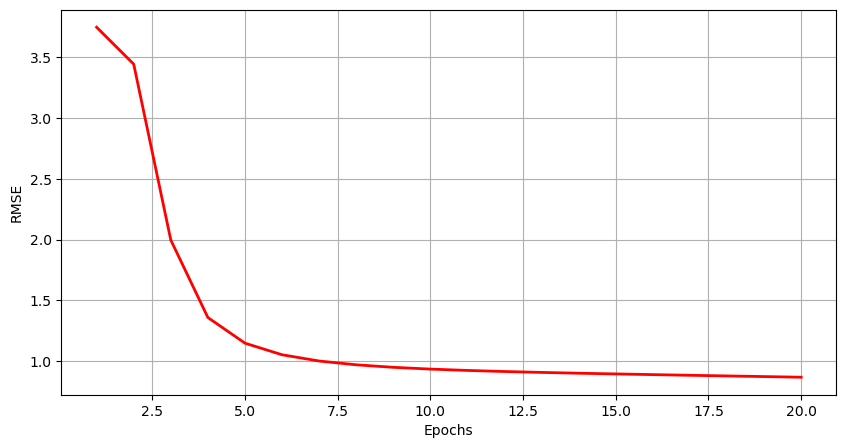

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), epoch_rmse, linewidth=2, color="red")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

In [44]:
predictions: list[float] = []
ture_ratings: list[float] = []

for _, row in tqdm(test_data.iterrows(), total=test_data.shape[0]):
    user_id = int(row["user_id"])
    movie_id = int(row["movie_id"])
    true_rating = row["user_rating"]
    
    predicted_rating = predict_rating(user_id, movie_id)
    predictions.append(round(predicted_rating))
    ture_ratings.append(true_rating)

100%|██████████| 40000/40000 [00:00<00:00, 58488.77it/s]


In [45]:
predictions

[3,
 4,
 4,
 3,
 2,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 2,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 4,
 5,
 3,
 4,
 4,
 3,
 2,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 2,
 2,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 2,
 3,
 3,
 3,
 4,
 4,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 3,
 2,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 5,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 2,
 4,
 4,
 3,
 3,
 2,
 3,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 1,
 4,
 3,
 4,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 2,
 4,
 1,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 2,
 4,
 4,


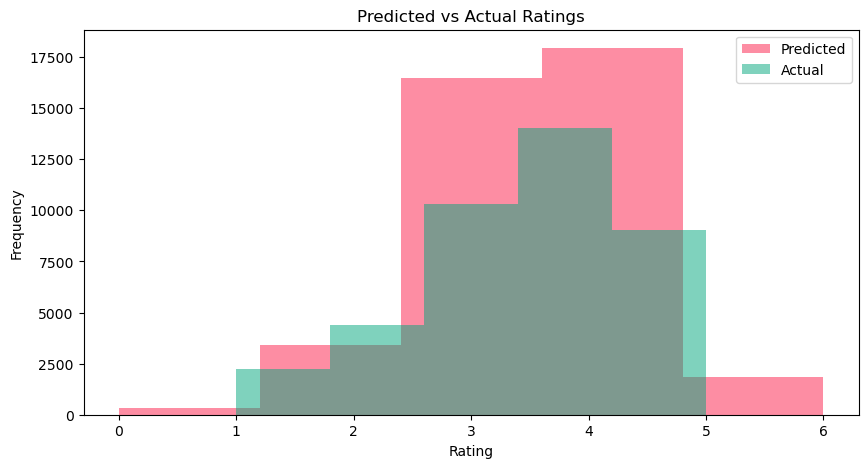

In [46]:
plt.figure(figsize=(10, 5))
plt.hist(predictions, bins=5, alpha=0.5, label="Predicted", color="#fc1c49")
plt.hist(ture_ratings, bins=5, alpha=0.5, label="Actual", color="#00a67d")
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()